In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

Первое, что я сделала - загрузила данные с сайта "eda.ru" (код представлен в отдельном файле food.py ) В дальнейшем мы будем работать с датафреймом, составленным по этим данным. 

In [71]:
recipes = pd.read_csv('food.csv')

In [72]:
recipes.head(10)

,название,категория,кухня,вид меню,кол-во ингредиентов,кол-во порций,время приготовления,кол-во сохранений,кол-во лайков,кол-во дизлайков
0,Брауни (brownie),Выпечка и десерты,Американская кухня,Любое,6 ингредиентов,6 порций,40 минут,27805,3152,259
1,Сырники из творога,Завтраки,Русская кухня,Любое,5 ингредиентов,2 порции,30 минут,27725,3037,308
2,Спагетти карбонара со сливками,Паста и пицца,Итальянская кухня,Любое,10 ингредиентов,2 порции,20 минут,23730,2486,244
3,Классическая шарлотка,Выпечка и десерты,Русская кухня,Любое,6 ингредиентов,12 порций,35 минут,20801,2096,252
4,Лазанья классическая с мясом,Паста и пицца,Итальянская кухня,Любое,8 ингредиентов,6 порций,40 минут,21095,1733,178
5,Тонкие блины на молоке,Выпечка и десерты,Русская кухня,Любое,6 ингредиентов,4 порции,40 минут,16754,1941,341
6,Американский тыквенный пирог с корицей,Выпечка и десерты,Американская кухня,Любое,9 ингредиентов,8 порций,2 часа,17419,1391,174
7,"Салат из красной фасоли с творожным сыром, кра...",Салаты,Итальянская кухня,Любое,9 ингредиентов,4 порции,7 минут,15178,1173,120
8,Азу по-татарски,Основные блюда,Татарская кухня,Любое,7 ингредиентов,4 порции,30 минут,15688,1205,97
9,Пирог «Зебра»,Выпечка и десерты,Французская кухня,Любое,7 ингредиентов,4 порции,30 минут,12457,1300,157


Первое, что пришло в голову, это посмотреть, какие категории еды чаще всего встречаются на этом сайте. 

In [73]:
category_data = recipes['категория'].value_counts()
category_data.head(10)

категория
Основные блюда       2607
Выпечка и десерты    2567
Закуски              1172
Супы                  831
Салаты                825
Завтраки              516
Напитки               412
Паста и пицца         357
Соусы и маринады      163
Сэндвичи              130
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

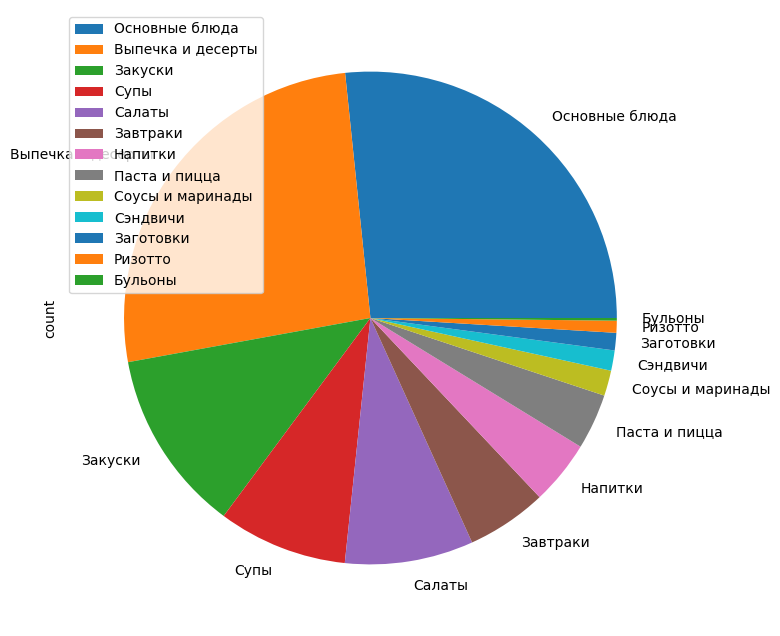

In [74]:
category_data = category_data.to_frame()
categories = category_data.index.tolist()
counter = category_data['count'].tolist()
category_data.plot.pie(figsize=(8, 8), subplots=True)


In [75]:
most_popular_category = category_data[category_data['count'] == max(counter)].index.tolist()[0]
least_popular_category = category_data[category_data['count'] == min(counter)].index.tolist()[0]
print(f'Больше всего рецептов из категори {most_popular_category}, меньше всего из {least_popular_category}')

Больше всего рецептов из категори Основные блюда, меньше всего из Бульоны


Теперь давайте посмотрим, какая кухня чаще всего встречается

In [76]:
cuisine_data = recipes['кухня'].value_counts()
cuisine_data.head(10)

кухня
Европейская кухня     1976
Русская кухня         1893
Итальянская кухня      894
Французская кухня      755
Авторская кухня        543
Американская кухня     531
Не указано             348
Грузинская кухня       176
Японская кухня         172
Китайская кухня        172
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

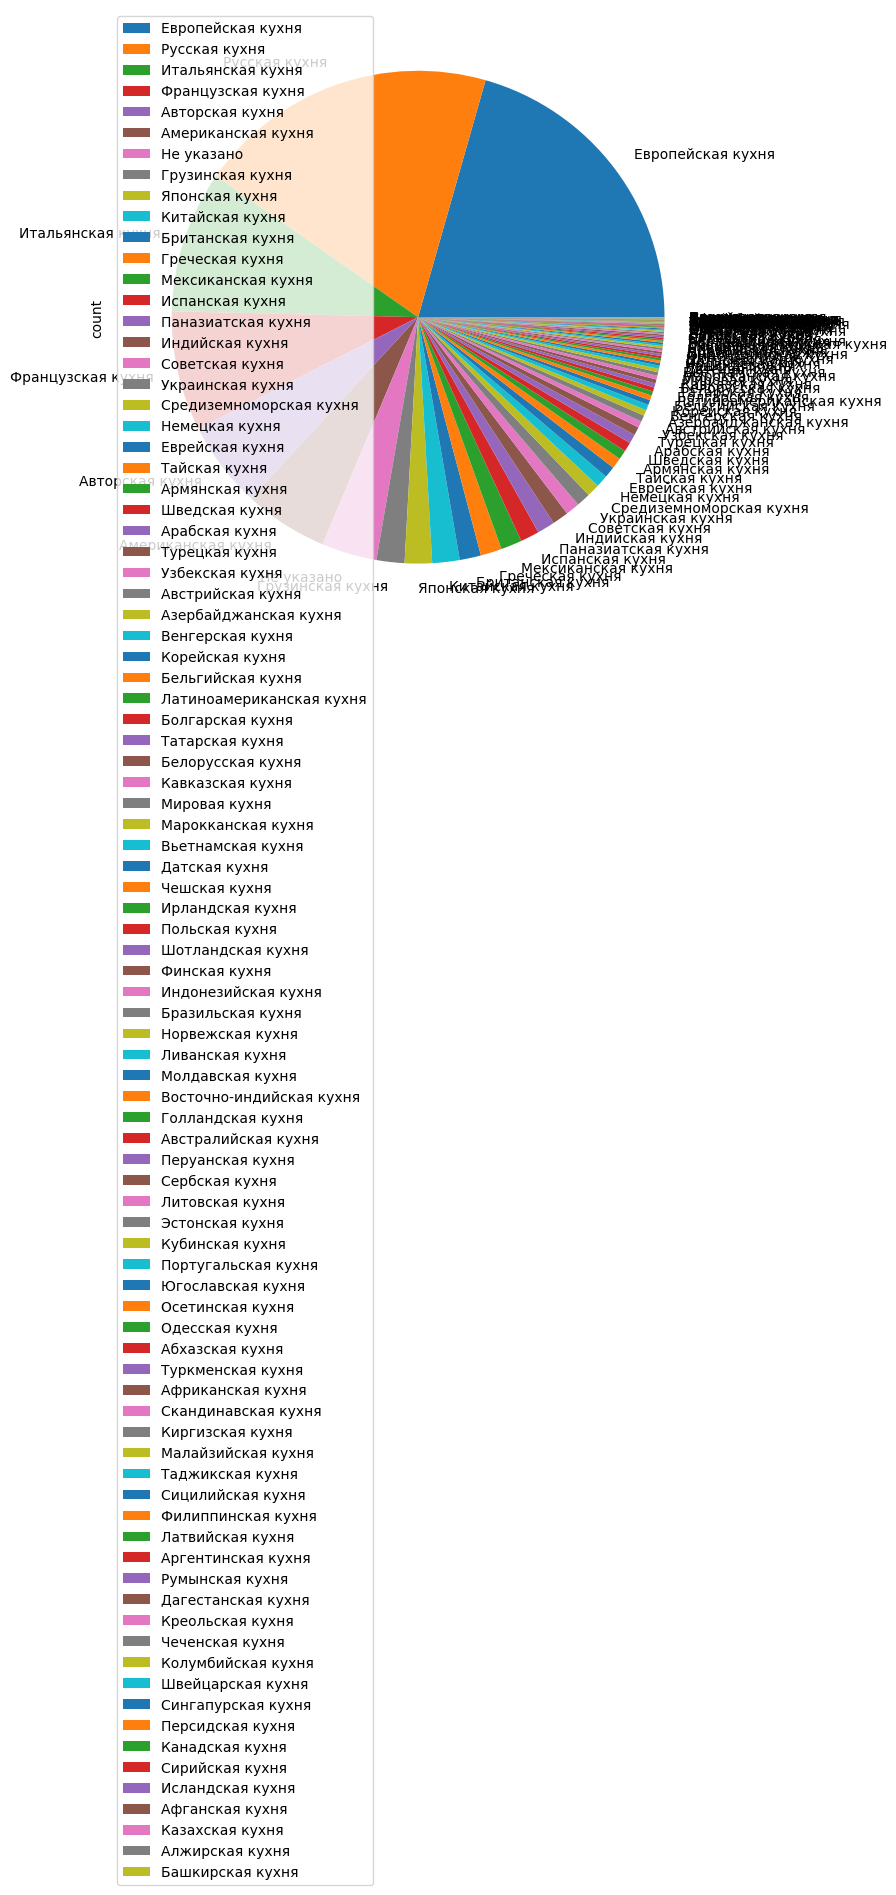

In [77]:
cuisine_data = cuisine_data.to_frame()
cuisine = cuisine_data.index.tolist()
counter = cuisine_data['count'].tolist()
cuisine_data.plot.pie(figsize=(8, 8), subplots=True)

In [78]:
most_popular_cuisine = cuisine_data[cuisine_data['count'] == max(counter)].index.tolist()[0]
least_popular_cuisine = cuisine_data[cuisine_data['count'] == min(counter)].index.tolist()[0]
print(f'Наиболее популярна {most_popular_cuisine}, наименее - {least_popular_cuisine}')

Наиболее популярна Европейская кухня, наименее - Чеченская кухня


Теперь можно приступить к более детальному анализу

Я хочу проверить гипотезу о том, что есть отрицательная зависимость между количеством ингредиентов и количеством сохранений.Зачем тратить много денег на ингредиенты, если за эту же сумму можно заказать вкусное готовое блюдо. Для проверки гипотезы я сначала построю матрицу корреляции. Для этого нужно перевести некоторые значения в целочисленные 

In [79]:
prepare_time = recipes['время приготовления'].to_list()
int_prepare_time = list()
for item in prepare_time:
    lst = item.split()
    if len(lst) == 2:
        if 'минут' in lst[1]:
            item = int(lst[0])
            int_prepare_time.append(item)
        elif 'час' in lst[1]: # переводим часы в минуты
            item = int(lst[0]) * 60
            int_prepare_time.append(item)
        elif 'сут' in lst[1]: # переводим сутки в минуты
            item = int(lst[0]) * 24 * 60
            int_prepare_time.append(item)
    elif len(lst) == 4:
        item = int(lst[0].strip()) * 60 + int(lst[2].strip())
        int_prepare_time.append(item)

ingredients_count = recipes['кол-во ингредиентов'].to_list()
int_ingredients_count = list()
for item in ingredients_count: # переводим значения из столбца "кол-во ингредиентов" в целочисленные
    lst = item.split()
    int_ingredients_count.append(int(lst[0]))
    
portions_count = recipes['кол-во порций'].to_list()
int_portions_count = list()
for item in ingredients_count: # переводим значения из столбца "кол-во порций" в целочисленные
    lst = item.split()
    int_portions_count.append(int(lst[0]))
    
save_count = recipes['кол-во сохранений'].to_list()# Сохраняем количества сохранений в отдельный список 
like_count = recipes['кол-во лайков'].to_list() #Аналогичное делаем с количеством лайков 
dislike_count = recipes['кол-во дизлайков'].to_list() #И с количеством дизлайков
 
#Сделаем новый датафрейм для удобства
data = {'кол-ва сохранений' : save_count, 'кол-во лайков' : like_count, 'кол-во дизлайков' : dislike_count, 'кол-во порций' : int_portions_count, 'кол-во ингредиентов' : int_ingredients_count, 'время приготовления' : int_prepare_time}
df = pd.DataFrame(data, columns=['кол-ва сохранений','кол-во лайков', 'кол-во дизлайков', 'кол-во порций', 'кол-во ингредиентов', 'время приготовления'])
df.tail(5)

,кол-ва сохранений,кол-во лайков,кол-во дизлайков,кол-во порций,кол-во ингредиентов,время приготовления
9781,12,1,0,5,5,10
9782,12,1,0,14,14,60
9783,12,1,0,10,10,30
9784,12,1,0,14,14,15
9785,12,1,0,14,14,60


Теперь все готово, чтобы строить корреляционную матрицу!

In [80]:
corr = df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,кол-ва сохранений,кол-во лайков,кол-во дизлайков,кол-во порций,кол-во ингредиентов,время приготовления
кол-ва сохранений,1.000000,0.923040,0.881420,-0.115447,-0.115447,-0.055055
кол-во лайков,0.923040,1.000000,0.928358,-0.087975,-0.087975,-0.043844
кол-во дизлайков,0.881420,0.928358,1.000000,-0.125943,-0.125943,-0.046276
кол-во порций,-0.115447,-0.087975,-0.125943,1.000000,1.000000,0.148084
кол-во ингредиентов,-0.115447,-0.087975,-0.125943,1.000000,1.000000,0.148084
время приготовления,-0.055055,-0.043844,-0.046276,0.148084,0.148084,1.000000


Из матрицы корреляции можно сделать много интересных выводов! Например, видно,что моя гипотеза подтвердилась! Действительно, между количеством ингредиентов и количеством сохранений есть отрицательная зависимость, однако совсем незначительная. 
 Также можно заметить, что между количеством лайков и дизлайков положительная зависимость, что логично. Чем больше людей посмотрели рецепт, тем большему количеству он как понравится, так и не понравится. Еще видно, что люди не любят тратить много времени на готовку и я не могу не согласиться. 

Теперь я построю график, связывающий количество сохранений и количество ингредиентов, чтобы наглядно продемонстрировать зависимость. 


Сначала отсортируем датафрейм по возрастанию сохранений


In [81]:
df = df.sort_values(by='кол-ва сохранений')
print(df.tail(5))    

    кол-ва сохранений  кол-во лайков  кол-во дизлайков  кол-во порций  \
4               21095           1733               178              8   
2               23730           2486               244             10   
1               27725           3037               308              5   
0               27805           3152               259              6   
44              27992           2834               272             12   

    кол-во ингредиентов  время приготовления  
4                     8                   40  
2                    10                   20  
1                     5                   30  
0                     6                   40  
44                   12                   60  


Итак, все готово, чтобы строить график

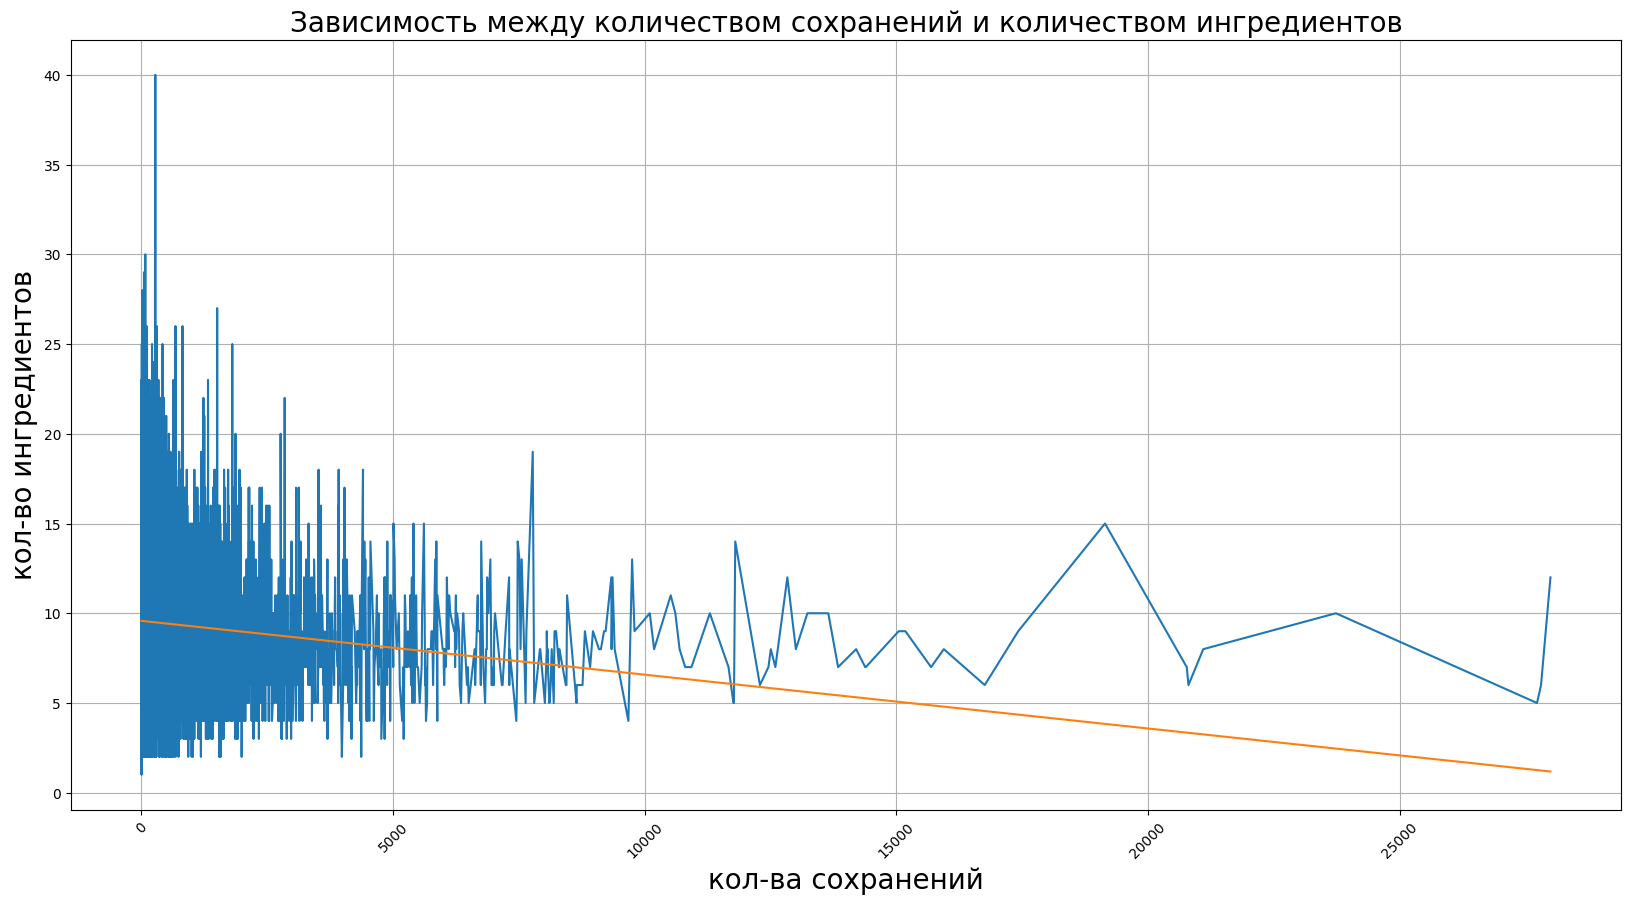

In [82]:
#Строим график
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['кол-ва сохранений'], df['кол-во ингредиентов'])
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('кол-ва сохранений', fontsize=20)
plt.ylabel('кол-во ингредиентов', fontsize=20)
plt.title('Зависимость между количеством сохранений и количеством ингредиентов', fontsize=20) 
#Посчитаем линию тренда
z = np.polyfit (df['кол-ва сохранений'], df['кол-во ингредиентов'], 1 )
p = np.poly1d (z)
#Добавим линию тренда
plt.plot (df['кол-ва сохранений'], p(df['кол-ва сохранений'])) 
plt.show()


Таким образом, линия тренда показывает отрицательную зависимость, что с увеличением кол-ва сохранений кол-во ингредиентов падает!

Теперь давате найдем кухню с "наилучшим" соотношением лайков и дизлайков . Моя гипотеза в том, что это просто обязана быть итальянская кухня.

Убираем пробелы из названий для работы с sql

In [83]:
recipes = recipes.rename(columns={'вид меню': 'вид_меню', 'кол-во ингредиентов': 'кол-во_ингредиентов', 'кол-во лайков': 'лайки', 'кол-во дизлайков': 'дизлайки'})
recipes.head(10)

,название,категория,кухня,вид_меню,кол-во_ингредиентов,кол-во порций,время приготовления,кол-во сохранений,лайки,дизлайки
0,Брауни (brownie),Выпечка и десерты,Американская кухня,Любое,6 ингредиентов,6 порций,40 минут,27805,3152,259
1,Сырники из творога,Завтраки,Русская кухня,Любое,5 ингредиентов,2 порции,30 минут,27725,3037,308
2,Спагетти карбонара со сливками,Паста и пицца,Итальянская кухня,Любое,10 ингредиентов,2 порции,20 минут,23730,2486,244
3,Классическая шарлотка,Выпечка и десерты,Русская кухня,Любое,6 ингредиентов,12 порций,35 минут,20801,2096,252
4,Лазанья классическая с мясом,Паста и пицца,Итальянская кухня,Любое,8 ингредиентов,6 порций,40 минут,21095,1733,178
5,Тонкие блины на молоке,Выпечка и десерты,Русская кухня,Любое,6 ингредиентов,4 порции,40 минут,16754,1941,341
6,Американский тыквенный пирог с корицей,Выпечка и десерты,Американская кухня,Любое,9 ингредиентов,8 порций,2 часа,17419,1391,174
7,"Салат из красной фасоли с творожным сыром, кра...",Салаты,Итальянская кухня,Любое,9 ингредиентов,4 порции,7 минут,15178,1173,120
8,Азу по-татарски,Основные блюда,Татарская кухня,Любое,7 ингредиентов,4 порции,30 минут,15688,1205,97
9,Пирог «Зебра»,Выпечка и десерты,Французская кухня,Любое,7 ингредиентов,4 порции,30 минут,12457,1300,157


In [84]:
engine = create_engine('sqlite:///recipes_db.sqlite')

recipes.to_sql('recipes', engine, if_exists='replace')

9786

In [85]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [86]:
%sql sqlite:///recipes_db.sqlite

In [87]:
%%sql
WITH help as (SELECT кухня, AVG(лайки/дизлайки) AS Среднее_отношение_лайков_к_дизлайкам
FROM recipes
GROUP BY 1)

SELECT кухня, MAX(Среднее_отношение_лайков_к_дизлайкам) FROM help
;

 * sqlite:///recipes_db.sqlite
Done.


кухня,MAX(Среднее_отношение_лайков_к_дизлайкам)
Норвежская кухня,15.625


Получили неожиданный результат! Видимо, стоит попробовать норвежскую кухню)

Напоследок давайте выведем самое вкусное блюдо на основе данных

In [88]:
%%sql
WITH help as (SELECT название, кухня, AVG(лайки/дизлайки) AS Среднее_отношение_лайков_к_дизлайкам
FROM recipes
GROUP BY 1)

SELECT название,кухня, MAX(Среднее_отношение_лайков_к_дизлайкам) FROM help
;

 * sqlite:///recipes_db.sqlite
Done.


название,кухня,MAX(Среднее_отношение_лайков_к_дизлайкам)
Уэвос-ранчерос с чоризо,Мексиканская кухня,91.0


Звучит очень вкусно!

На этом я завершаю свой проект. Всем приятного аппетита!